<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/tf_idf_main_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align='center'>NLP Tutorial - Text Representation: TF-IDF</h2>

### What is TF-IDF?

- TF stands for **Term Frequency** and denotes the ratio of  number of times a particular word appeared in a Document to total number of words in the document.
          
         Term Frequency(TF) = [number of times word appeared / total no of words in a document]

- Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.


- IDF stands for **Inverse Document Frequency** and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

         Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]
        
- In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0.


- Finally:
         
         TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)

- **Let's see a Sample Demo**

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [53]:
#let's create the vectorizer and fit the corpus and transform them accordingly
v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [54]:
#let's print the vocabulary

print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [55]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:

    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)

    #get the score
    idf_score = v.idf_[indx]

    print(f"{word} : {idf_score}")

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2.386294361119891
thor : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


In [56]:
#let's print the transformed output from tf-idf
print(transform_output.toarray())

[[0.24266547 0.         0.         0.         0.         0.
  0.         0.24266547 0.         0.         0.40286636 0.
  0.         0.         0.         0.24266547 0.11527033 0.24266547
  0.         0.         0.         0.         0.72799642 0.
  0.         0.24266547 0.         0.        ]
 [0.         0.         0.         0.         0.30652086 0.5680354
  0.         0.         0.         0.         0.         0.
  0.         0.         0.5680354  0.         0.26982671 0.
  0.         0.         0.30652086 0.         0.         0.
  0.         0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.26982671 0.
  0.         0.5680354  0.30652086 0.         0.         0.
  0.5680354  0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.

### Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories

Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification


- This data consists of two columns.

| Text | Label |
| --- | --- |
| Indira Designer Women's Art Mysore Silk Saree With Blouse Piece (Star-Red) This Saree Is Of Art Mysore Silk & Comes With Blouse Piece. | Clothing & Accessories |
|IO Crest SY-PCI40010 PCI RAID Host Controller Card Brings new life to any old desktop PC. Connects up to 4 SATA II high speed SATA hard disk drives. Supports Windows 8 and Server 2012|Electronics|
|Operating Systems in Depth About the Author Professor Doeppner is an associate professor of computer science at Brown University. His research interests include mobile computing in education, mobile and ubiquitous computing, operating systems and distribution systems, parallel computing, and security.|Books|

- ***Text***: Description of an item sold on e-commerce website
- ***Label***: Category of that item. Total 4 categories: "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.


In [82]:
import pandas as pd

#read the data into a pandas dataframe
with open('Ecommerce_data.csv', 'r', encoding='utf-8', errors='ignore') as file:
    df = pd.read_csv(file)
# df = pd.read_csv("Ecommerce_data.csv",encoding='ISO-8859-1')
print(df.shape)
df.head(5)

(23999, 7)


,Text,label,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,NaN,NaN,NaN,NaN,NaN
1,"Contrast living Wooden Decorative Box,Painted ...",Household,NaN,NaN,NaN,NaN,NaN
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,NaN,NaN,NaN,NaN,NaN
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,NaN,```````````,NaN,NaN,NaN
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,NaN,NaN,NaN,NaN,NaN


In [83]:
#check the distribution of labels
df['label'].value_counts()

,count
label,
Clothing & Accessories,6000
Electronics,5999
Books,5999
Household,5998
Nexus 10,1
catalogs,1
as we are the manufacturers,1


- From the above, we can see that almost all the labels(classes) occured equal number of times and perfectly balanced. There is no problem of class imbalance and hence no need to apply any balancing techniques like undersampling, oversampling etc.

In [84]:
#Add the new column which gives a unique number to each of these labels

df['label_num'] = df['label'].map({
    'Household' : 0,
    'Books': 1,
    'Electronics': 2,
    'Clothing & Accessories': 3
})

#checking the results
df.head(5)

,Text,label,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,NaN,NaN,NaN,NaN,NaN,0.0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,NaN,NaN,NaN,NaN,NaN,0.0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,NaN,NaN,NaN,NaN,NaN,2.0
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,NaN,```````````,NaN,NaN,NaN,3.0
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,NaN,NaN,NaN,NaN,NaN,3.0


<h3>Train test split</h3>

- Build a model with original text (no pre processing)

stratify splitting means that when you generate a training / test dataset split, it will attempt to keep the same percentages of classes in each split

In [85]:
print(df['label_num'].isnull().sum())
df = df.dropna(subset=['label_num'])

3


In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text,
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [87]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
#(19200,)
#(4800,)


Shape of X_train:  (19196,)
Shape of X_test:  (4800,)


In [88]:
X_train.head()

,Text
10007,Royaloak Zara Study Desk (Wengey) Compact in s...
166,Adbucks Women's Silky Cotton Denim Stretchable...
56,Lenovo Ideapad 330 Core i5 8th Gen 15.6-inch F...
6440,"Avira Home Dual Reversible Cotton Face Towel, ..."
10450,Sigma 150-600 mm f/5-6.3 DG OS HSM Contemporar...


In [89]:
y_train.value_counts()

,count
label_num,
3.0,4800
2.0,4799
1.0,4799
0.0,4798


In [90]:
y_test.value_counts()

,count
label_num,
0.0,1200
2.0,1200
3.0,1200
1.0,1200


**Attempt 1** :

1. using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

**Note:**
- use TF-IDF for pre-processing the text.

- use **KNN** as the classifier
- print the classification report.

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1200
         1.0       0.97      0.95      0.96      1200
         2.0       0.97      0.96      0.96      1200
         3.0       0.98      0.98      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [92]:
X_test[:5]

,Text
20708,Invezo Impression Portable Foldable Reusable G...
19166,Asus Nvidia GeForce GT 710 2GB 64-Bit DDR3 PCI...
15208,FabSeasons Camouflage Polyester Multi Function...
2462,Indian Superfoods: Change the Way You Eat Revi...
6620,"Milton Marvel Insulated Steel Casseroles, Juni..."


In [93]:
y_test[:5]

,label_num
20708,0.0
19166,2.0
15208,3.0
2462,1.0
6620,3.0


In [94]:
y_pred[:5]

array([0., 2., 3., 1., 0.])

**Attempt 2** :

1. using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

**Note:**
- use TF-IDF for pre-processing the text.

- use **MultinomialNB** as the classifier.
- print the classification report.


In [95]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      1200
         1.0       0.99      0.92      0.95      1200
         2.0       0.95      0.97      0.96      1200
         3.0       0.98      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



**Attempt 3** :

1. using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

**Note:**
- use TF-IDF for pre-processing the text.

- use **Random Forest** as the classifier.
- print the classification report.


In [96]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1200
         1.0       0.97      0.97      0.97      1200
         2.0       0.98      0.97      0.97      1200
         3.0       0.98      0.99      0.99      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



<h3>Use text pre-processing to remove stop words, punctuations and apply lemmatization </h3>

In [97]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [98]:
df['preprocessed_txt'] = df['Text'].apply(preprocess)

In [99]:
df.head()

,Text,label,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,label_num,preprocessed_txt
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,NaN,NaN,NaN,NaN,NaN,0.0,Urban Ladder Eisner low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,NaN,NaN,NaN,NaN,NaN,0.0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,NaN,NaN,NaN,NaN,NaN,2.0,IO Crest SY PCI40010 PCI raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,NaN,```````````,NaN,NaN,NaN,3.0,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,NaN,NaN,NaN,NaN,NaN,3.0,Indira Designer Women Art Mysore Silk Saree Bl...


In [100]:
df.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [101]:
df.preprocessed_txt[0]

'Urban Ladder Eisner low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

**Build a model with pre processed text**

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt,
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

**Let's check the scores with our best model till now**
- Random Forest

In [103]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1200
         1.0       0.98      0.97      0.97      1200
         2.0       0.98      0.97      0.97      1200
         3.0       0.98      0.99      0.99      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



If you compare above classification report with respect to **RandomForest Model** with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text. The F1 score improved in the case of preprocessed data. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model.

**Plot confusion matrix**

In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1154,   15,   19,   12],
       [  20, 1167,    9,    4],
       [  22,   11, 1163,    4],
       [   8,    3,    1, 1188]])

Text(95.72222222222221, 0.5, 'Truth')

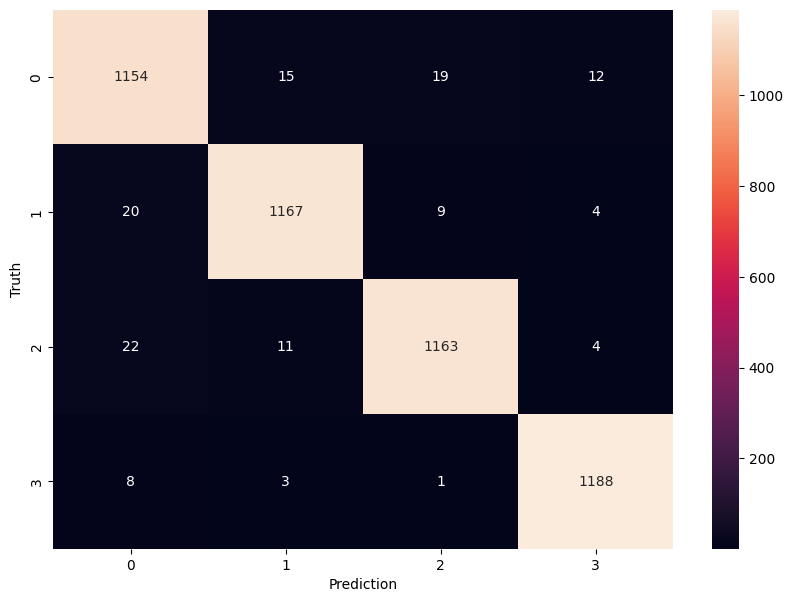

In [105]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

Exercise: Use text pre-processing to remove stop words, punctuations and apply lemmatization and retrain your model and give the improvement in model accuracy

class exercise: use spacy or NLTK for removing stop words and punctuation and use Random forest classifier and see the performance of model.